In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime 
import cv2
from PIL import Image
from keras import backend, optimizers
from focal_loss import BinaryFocalLoss
import pandas as pd

In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
image_directory = 'Dataset/Dataset/Train/Images/'
mask_directory = 'Dataset/Dataset/Train/Masks/'

In [4]:
SIZE = 256
image_dataset = []  
mask_dataset = []  

In [5]:
images = os.listdir(image_directory)
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'tif'):
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 1)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

In [6]:
masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'tif'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))

In [7]:
image_dataset = np.array(image_dataset)/255.
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

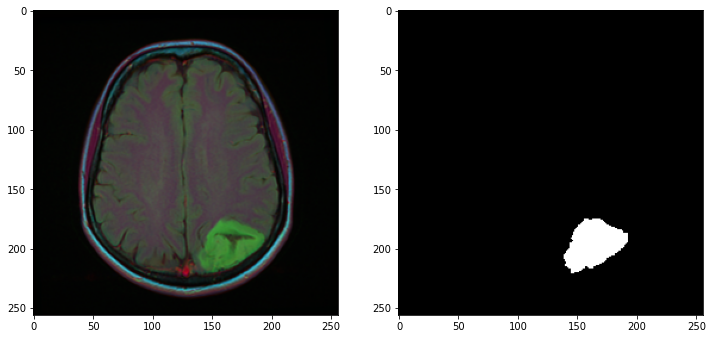

In [9]:
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256, 3)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

In [10]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
num_labels = 1  #Binary
input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
batch_size = 1

In [11]:
from seaunet import SEAUNet, jacard_coef, dice_coef, jacard_coef_loss, dice_coef_loss

In [12]:
seaunet_model = SEAUNet(input_shape)
seaunet_model.compile(optimizer=Adam(lr = 1e-2), loss=BinaryFocalLoss(gamma=2),
                     metrics=[dice_coef ,jacard_coef])


print(seaunet_model.summary())

Model: "SE_Attention_UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                 

 max_pooling2d_2 (MaxPooling2D)  (None, 32, 32, 256)  0          ['tf.math.multiply_1[0][0]']     
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 512)  1180160     ['max_pooling2d_2[0][0]']        
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 32, 32, 512)  2048       ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 32, 32, 512)  0           ['batch_normalization_6[0][0]']  
                                                                                                  
 conv2d_7 (Conv2D)              (None, 32, 32, 512)  2359808     ['activation_6[0][0]']           
          

C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 activation_10 (Activation)     (None, 16, 16, 512)  0           ['batch_normalization_10[0][0]'] 
                                                                                                  
 conv2d_12 (Conv2D)             (None, 16, 16, 512)  262656      ['activation_10[0][0]']          
                                                                                                  
 conv2d_transpose (Conv2DTransp  (None, 16, 16, 512)  2359808    ['conv2d_12[0][0]']              
 ose)                                                                                             
                                                                                                  
 conv2d_11 (Conv2D)             (None, 16, 16, 512)  1049088     ['activation_7[0][0]']           
                                                                                                  
 add (Add)

 up_sampling2d_3 (UpSampling2D)  (None, 64, 64, 512)  0          ['activation_14[0][0]']          
                                                                                                  
 batch_normalization_15 (BatchN  (None, 64, 64, 256)  1024       ['conv2d_21[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 concatenate_1 (Concatenate)    (None, 64, 64, 768)  0           ['up_sampling2d_3[0][0]',        
                                                                  'batch_normalization_15[0][0]'] 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 64, 64, 256)  1769728     ['concatenate_1[0][0]']          
                                                                                                  
 batch_nor

 conv2d_31 (Conv2D)             (None, 128, 128, 64  8256        ['activation_24[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 128, 128, 64  256        ['conv2d_31[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_25 (Activation)     (None, 128, 128, 64  0           ['batch_normalization_22[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_33 (Conv2D)             (None, 128, 128, 64  4160        ['activation_25[0][0]']          
          

In [13]:
seaunet_history = seaunet_model.fit(X_train, y_train, 
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(X_test, y_test ), 
                    shuffle=False,
                    epochs=5)

Epoch 1/5
630/630 [==============================] - 1044s 2s/step - loss: 0.0327 - dice_coef: 0.0574 - jacard_coef: 0.0312 - val_loss: 0.0155 - val_dice_coef: 0.0882 - val_jacard_coef: 0.0498
Epoch 2/5
630/630 [==============================] - 1033s 2s/step - loss: 0.0111 - dice_coef: 0.0900 - jacard_coef: 0.0508 - val_loss: 0.0422 - val_dice_coef: 0.1141 - val_jacard_coef: 0.0662
Epoch 3/5
630/630 [==============================] - 1028s 2s/step - loss: 0.0096 - dice_coef: 0.1113 - jacard_coef: 0.0647 - val_loss: 0.0147 - val_dice_coef: 0.0945 - val_jacard_coef: 0.0554
Epoch 4/5
630/630 [==============================] - 1029s 2s/step - loss: 0.0088 - dice_coef: 0.1277 - jacard_coef: 0.0762 - val_loss: 0.0242 - val_dice_coef: 0.0627 - val_jacard_coef: 0.0342
Epoch 5/5
630/630 [==============================] - 1023s 2s/step - loss: 0.0086 - dice_coef: 0.1408 - jacard_coef: 0.0859 - val_loss: 0.0384 - val_dice_coef: 0.0363 - val_jacard_coef: 0.0197


In [14]:
seaunet_model.save('SeaUnet_B_focal.hdf5')

In [15]:
seaunet_history_df = pd.DataFrame(seaunet_history.history)

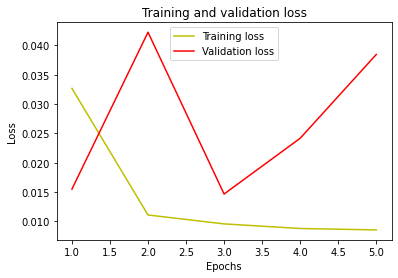

In [16]:
history = seaunet_history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

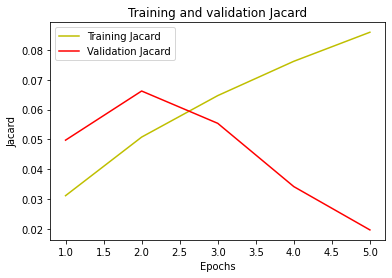

In [17]:
acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']
plt.plot(epochs, acc, 'y', label='Training Jacard')
plt.plot(epochs, val_acc, 'r', label='Validation Jacard')
plt.title('Training and validation Jacard')
plt.xlabel('Epochs')
plt.ylabel('Jacard')
plt.legend()
plt.show()

In [18]:
model = seaunet_model

model_path = "SeaUnet_B_focal.hdf5"
model = tf.keras.models.load_model(model_path, compile=False)

1/1 [==============================] - 0s 284ms/step


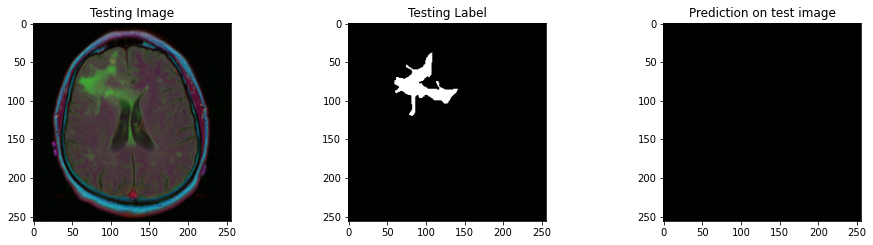

In [24]:
import random
test_img_number = random.randint(0, X_test.shape[0]-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]

test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img, cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

In [21]:
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(ground_truth[:,:,0], prediction)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.48843384


In [25]:
IoU_values = []
for img in range(0, X_test.shape[0]):
    temp_img = X_test[img]
    ground_truth=y_test[img]
    temp_img_input=np.expand_dims(temp_img, 0)
    prediction = (model.predict(temp_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
    
    IoU = MeanIoU(num_classes=n_classes)
    IoU.update_state(ground_truth[:,:,0], prediction)
    IoU = IoU.result().numpy()
    IoU_values.append(IoU)

    print(IoU)

1/1 [==============================] - 0s 298ms/step
1.0
1/1 [==============================] - 0s 304ms/step
0.47068787
1/1 [==============================] - 0s 311ms/step
0.49473572
1/1 [==============================] - 0s 306ms/step
0.49108124
1/1 [==============================] - 0s 380ms/step
0.48510742
1/1 [==============================] - 0s 407ms/step
0.49705505
1/1 [==============================] - 0s 337ms/step
0.48549652
1/1 [==============================] - 0s 379ms/step
0.48358917
1/1 [==============================] - 0s 395ms/step
1.0
1/1 [==============================] - 0s 305ms/step
1.0
1/1 [==============================] - 0s 373ms/step
0.49047852
1/1 [==============================] - 0s 302ms/step
1.0
1/1 [==============================] - 0s 310ms/step
0.48628235
1/1 [==============================] - 0s 317ms/step
1.0
1/1 [==============================] - 0s 308ms/step
1.0
1/1 [==============================] - 0s 304ms/step
0.4861679
1/1 [==============